In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sam_sub_data=pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [ ]:
sam_sub_data

In [4]:
test_data=pd.read_csv('/content/test_lAUu6dG.csv')

In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train_data=pd.read_csv('/content/train_ctrUa4K.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

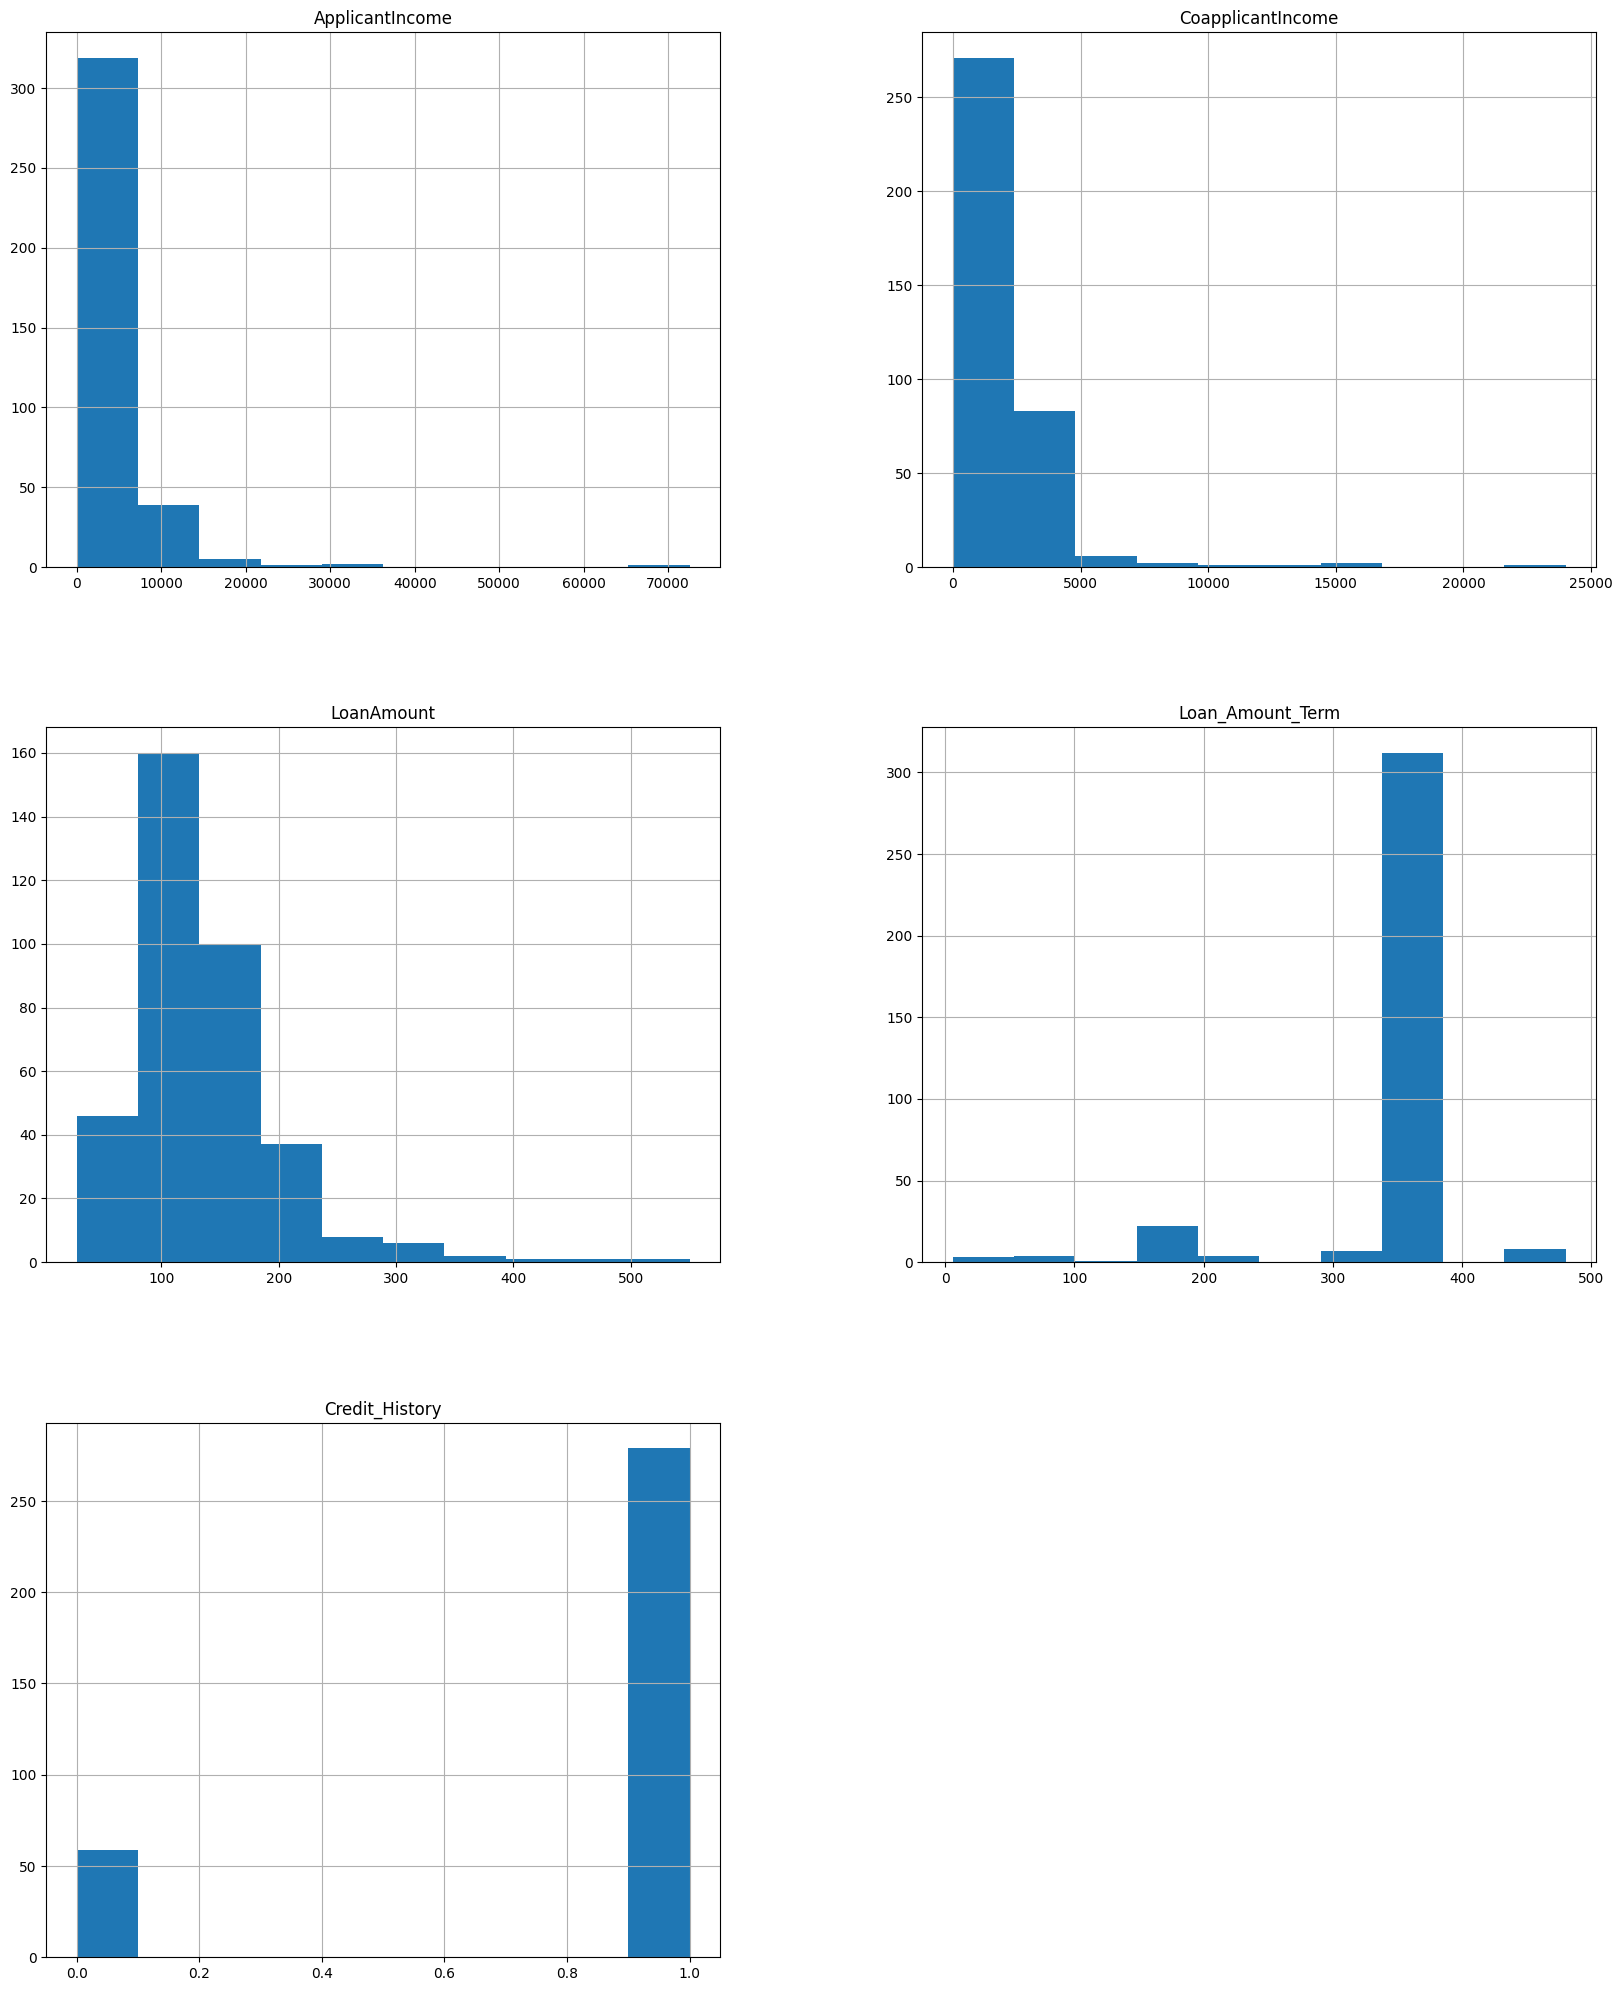

In [10]:
test_data.hist(figsize=(20,25));

In [11]:
#missing value handling
test_data['Gender']=test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean())
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mean())

In [12]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

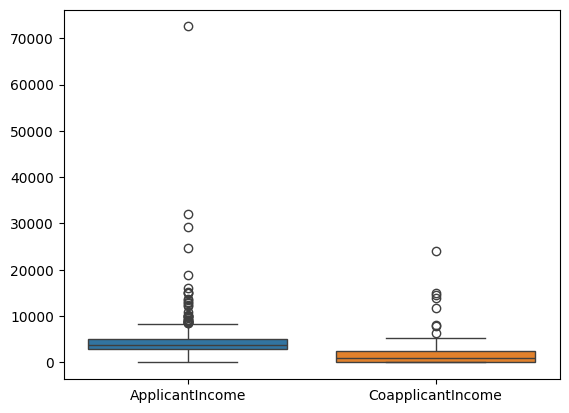

In [13]:
#checking outlier
sns.boxplot(test_data[['ApplicantIncome','CoapplicantIncome']])

<Axes: >

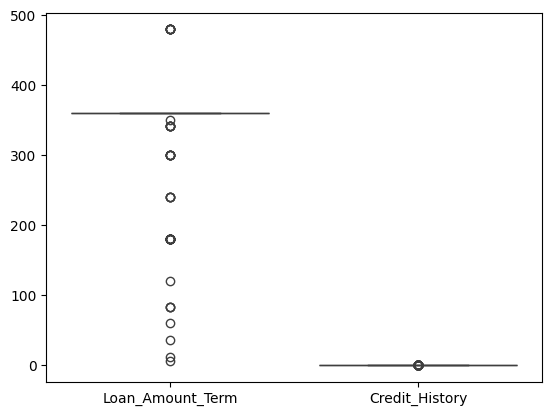

In [14]:
sns.boxplot(test_data[['Loan_Amount_Term','Credit_History']])

In [15]:
test_data.shape

(367, 12)

In [ ]:
test_data.head(3)

In [16]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [17]:
#labeling
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data['Gender']=le.fit_transform(test_data['Gender'])

In [18]:
test_data['Married']=le.fit_transform(test_data['Married'])

In [19]:
test_data['Education']=le.fit_transform(test_data['Education'])

In [21]:
test_data['Property_Area']=le.fit_transform(test_data['Property_Area'])

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

<ipython-input-24-c59221e9393d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(),annot=True)


<Axes: >

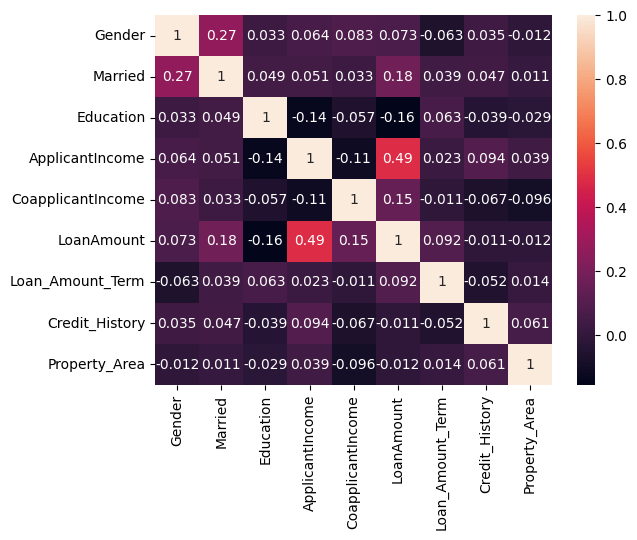

In [24]:
sns.heatmap(test_data.corr(),annot=True)

In [25]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train_data.hist(figsize=(20,25));

In [34]:
#missing value handling
train_data['Gender']=train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mean())

In [ ]:
train_data.isna().sum()

In [36]:
train_data['Loan_ID']=le.fit_transform(train_data['Loan_ID'])

In [37]:
train_data['Gender']=le.fit_transform(train_data['Gender'])

In [38]:
train_data['Married']=le.fit_transform(train_data['Married'])

In [40]:
train_data['Dependents']=le.fit_transform(train_data['Dependents'])

In [41]:
train_data['Education']=le.fit_transform(train_data['Education'])

In [42]:
train_data['Self_Employed']=le.fit_transform(train_data['Self_Employed'])

In [43]:
train_data['Property_Area']=le.fit_transform(train_data['Property_Area'])

In [44]:
train_data['Loan_Status']=le.fit_transform(train_data['Loan_Status'])

In [ ]:
train_data

In [52]:
train_data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<Axes: >

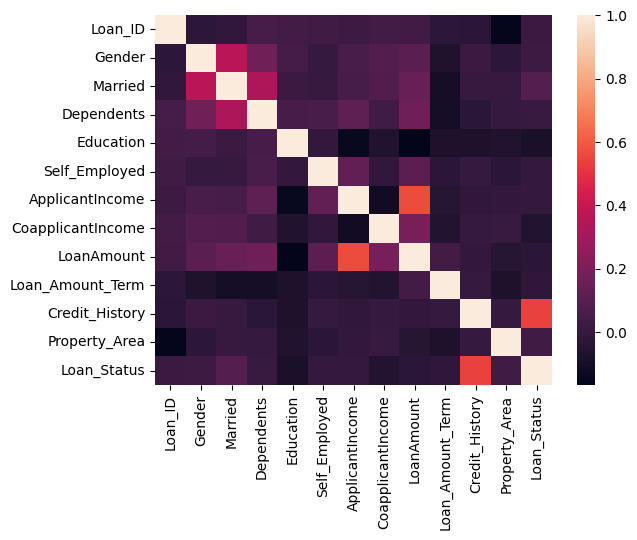

In [53]:
sns.heatmap(train_data.corr())

In [61]:
y=train_data['Loan_Status']
x=train_data.drop(['Loan_Status'],axis=1)

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

LINEAR REGRESSION

In [64]:
from sklearn import linear_model
lin_model=linear_model.LinearRegression()
model_loan=lin_model.fit(x_train,y_train)
predict_loan=model_loan.predict(x_test)

In [66]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predict_loan))

MSE is 0.17017696428511375


In [70]:
from sklearn.metrics import r2_score
print('r2_score :',r2_score(y_test,predict_loan))

r2_score : 0.25216541033612605


Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [73]:
log_reg.fit(x_train,y_train)
y_log_pred=log_reg.predict(x_test)
y_log_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_log_pred)

array([[21, 33],
       [ 2, 98]])

In [76]:
print('accuracy :',accuracy_score(y_test,y_log_pred))
print('precision :',precision_score(y_test,y_log_pred))
print('recall :',recall_score(y_test,y_log_pred))
print('f1 :',f1_score(y_test,y_log_pred))

accuracy : 0.7727272727272727
precision : 0.7480916030534351
recall : 0.98
f1 : 0.8484848484848484


KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [78]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

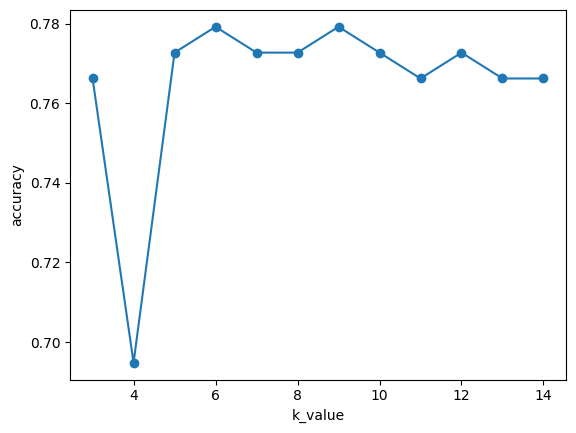

In [79]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [81]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [82]:
print('accuracy :',accuracy_score(y_test,y_pred_knn))
print('precision :',precision_score(y_test,y_pred_knn))
print('recall :',recall_score(y_test,y_pred_knn))
print('f1 :',f1_score(y_test,y_pred_knn))

accuracy : 0.7792207792207793
precision : 0.7704918032786885
recall : 0.94
f1 : 0.8468468468468469


SVM

In [96]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(x_train,y_train)
y_pred=sv_cl.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy is',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy is 0.7727272727272727
[[21 33]
 [ 2 98]]


DECISION TREE

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [91]:
print('accuracy is',accuracy_score(y_test,y_pred))


accuracy is 0.7142857142857143


RANDOM FOREST

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf1.fit(x_train,y_train)

y_pred=rf_clf1.predict(x_test)
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 0.7727272727272727
